In [206]:
# importing data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic Kaggle competition/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [208]:
# rows and columns
for vars in df:
  rows=df.shape[0]
  cols=df.shape[1]
print(f'rows : {rows}')
print(f'columns : {cols}')


rows : 891
columns : 12


In [209]:
# categorical and numerical columns

cat_cols=[x for x in df.columns if df[x].dtypes=='object']
num_cols=[x for x in df.columns if (df[x].dtypes=='int64') | (df[x].dtypes=='float64')]
print(f'Category columns : {cat_cols}')
print(f'Numeric columns : {num_cols}')

Category columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numeric columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [210]:
# na columns
df.isna().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [211]:
# age = mean values

df['Age']=df['Age'].fillna(df['Age'].mean())

In [212]:
# Embarked = mode 

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [213]:
df['Embarked']=df['Embarked'].fillna('S')

In [214]:
df.isna().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

In [215]:
# as cabin has more than 70 % nan values therefore dropped
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [216]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [217]:
# feature addition 

def age_range(x):
  if x<=16:
    return 0
  elif (x>16)&(x<=30):
    return 1
  elif (x>30)&(x<=45):
    return 2
  elif (x>45)&(x<=60):
    return 3
  else:
    return 4
  

In [218]:
df['Age_range']=df['Age'].apply(age_range)

In [219]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,2


In [220]:
## EDA and visualization

In [221]:
# univariate analyis


In [222]:
# survived class
survived=df['Survived'].value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

In [223]:
# Pclass
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [224]:
# Sex
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [225]:
# SibSp
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [226]:
uni_cols=['Survived','Pclass','Sex','SibSp','Parch','Embarked','Age_range']
for vars in uni_cols:
  count=df[vars].value_counts()
  print(vars)
  print(count)
  print('*'*50)

Survived
0    549
1    342
Name: Survived, dtype: int64
**************************************************
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
**************************************************
Sex
male      577
female    314
Name: Sex, dtype: int64
**************************************************
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
**************************************************
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
**************************************************
Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64
**************************************************
Age_range
1    486
2    202
0    100
3     81
4     22
Name: Age_range, dtype: int64
**************************************************


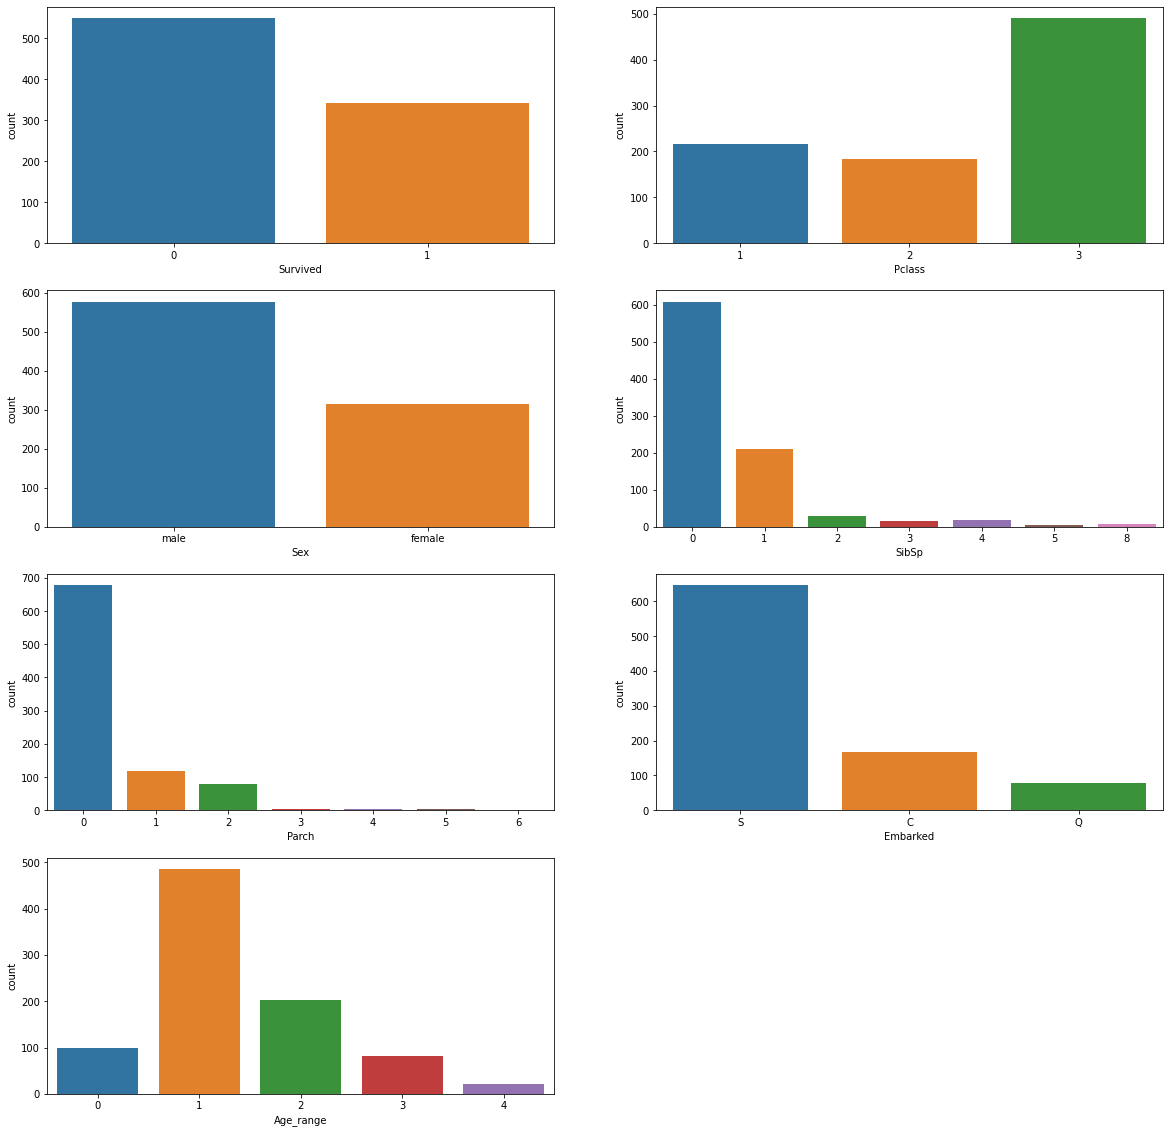

In [227]:
fig,axes=plt.subplots(4,2, figsize=(20,20))
for i,j in enumerate(uni_cols):
  ax=axes[int(i/2), i%2]
  
  sns.countplot(df[j], ax=ax)
fig.delaxes(axes[3][1])

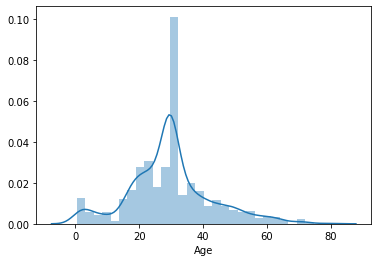

In [228]:
# kde histogram for numerical columns
sns.distplot(df["Age"])

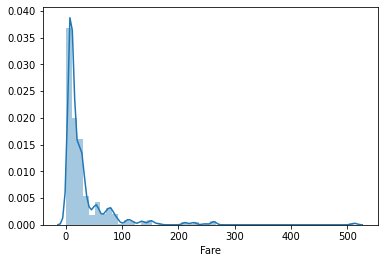

In [229]:
sns.distplot(df['Fare'])

In [230]:
# as it is left skewed so to make it normally distributed 

In [231]:
df[df['Fare']==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
179,0,3,male,36.000000,0,0,0.0,S,2
263,0,1,male,40.000000,0,0,0.0,S,2
271,1,3,male,25.000000,0,0,0.0,S,1
277,0,2,male,29.699118,0,0,0.0,S,1
302,0,3,male,19.000000,0,0,0.0,S,1
413,0,2,male,29.699118,0,0,0.0,S,1
466,0,2,male,29.699118,0,0,0.0,S,1
481,0,2,male,29.699118,0,0,0.0,S,1
597,0,3,male,49.000000,0,0,0.0,S,3
633,0,1,male,29.699118,0,0,0.0,S,1


In [232]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,2


In [233]:
# class wise suvival
class_survival=df.groupby(['Pclass', 'Survived'])['Pclass'].count()
class_survival

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

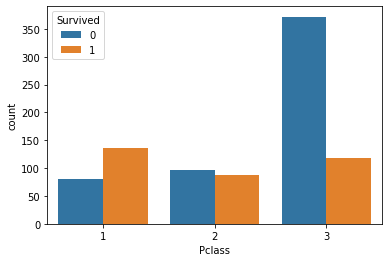

In [234]:
sns.countplot(df['Pclass'], hue=df['Survived'])

In [235]:
# sex with survival
sex_survival=df.groupby(['Sex', 'Survived'])['Survived'].count()
sex_survival

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

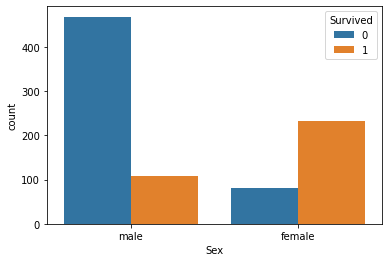

In [236]:
sns.countplot(df['Sex'],hue=df['Survived'])

In [237]:
# Embarked
embarked_survival=df.groupby(['Survived','Embarked'])['Embarked'].count()
embarked_survival

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           219
Name: Embarked, dtype: int64

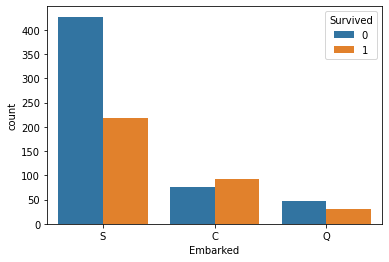

In [238]:
sns.countplot(df['Embarked'], hue=df['Survived'])

In [239]:
# Age_range
age_range_survival=df.groupby(['Age_range','Survived'])['Survived'].count()
age_range_survival

Age_range  Survived
0          0            45
           1            55
1          0           323
           1           163
2          0           116
           1            86
3          0            48
           1            33
4          0            17
           1             5
Name: Survived, dtype: int64

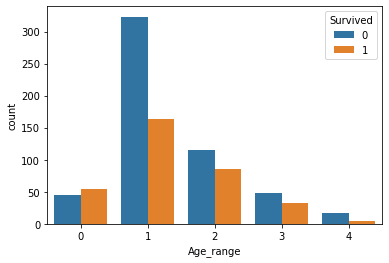

In [240]:
sns.countplot(df['Age_range'], hue=df['Survived'])

In [241]:
# age with survival
mean_age_survival=df.groupby(['Survived'])['Age'].mean()
mean_age_survival_max=df.groupby(['Survived'])['Age'].max()
print(mean_age_survival)
print('*'*20)
print(mean_age_survival_max)

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64
********************
Survived
0    74.0
1    80.0
Name: Age, dtype: float64


Text(0, 0.5, 'Mean Age')

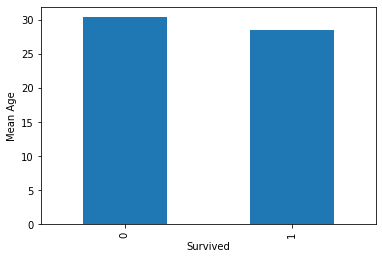

In [242]:
age_survival.plot(kind='bar')
plt.ylabel('Mean Age')

In [243]:
# Fare Embarked

fare_embarked=df.groupby('Embarked')['Fare'].mean()
fare_embarked_max=df.groupby('Embarked')['Fare'].max()
print(fare_embarked)
print('*'*20)
print(fare_embarked_max)

Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64
********************
Embarked
C    512.3292
Q     90.0000
S    263.0000
Name: Fare, dtype: float64


Text(0, 0.5, 'Mean fare')

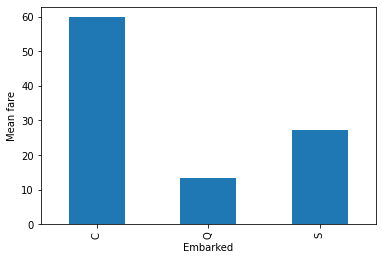

In [244]:
fare_embarked.plot(kind='bar')
plt.ylabel('Mean fare')

In [245]:
# class with fare
class_fare=df.groupby('Pclass')['Fare'].mean()
class_fare_max=df.groupby('Pclass')['Fare'].max()
print(class_fare)
print('*'*20)
print(class_fare_max)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
********************
Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64


In [246]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,2


In [247]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_range
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.038139
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.359972
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.932321
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.216399
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.139594
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.117730
Age_range,-0.038139,-0.359972,0.932321,-0.216399,-0.139594,0.117730,1.000000


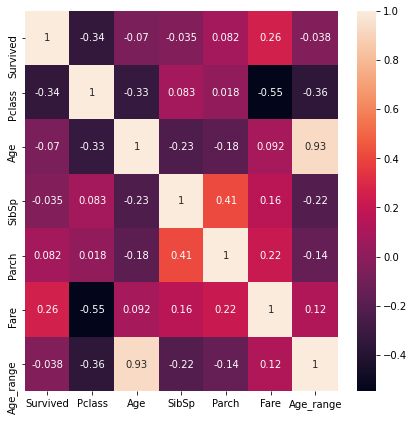

In [248]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)

In [249]:
df[(df['SibSp']==0)&(df['Parch']==0)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
2,1,3,female,26.000000,0,0,7.9250,S,1
4,0,3,male,35.000000,0,0,8.0500,S,2
5,0,3,male,29.699118,0,0,8.4583,Q,1
6,0,1,male,54.000000,0,0,51.8625,S,3
11,1,1,female,58.000000,0,0,26.5500,S,3
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,7.0500,S,1
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,1
889,1,1,male,26.000000,0,0,30.0000,C,1


In [250]:
df['ADD_col']=df['Parch']+df['SibSp']

In [251]:
## adding new feature

In [252]:
def alone(x):
  if x==0:
    return 0
  else:
    return 1

In [253]:
df['Alone']=df['ADD_col'].apply(alone)

In [254]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range,ADD_col,Alone
0,0,3,male,22.0,1,0,7.2500,S,1,1,1
1,1,1,female,38.0,1,0,71.2833,C,2,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,2,1,1
4,0,3,male,35.0,0,0,8.0500,S,2,0,0


In [255]:
df.drop(['SibSp','Parch','ADD_col'], axis=1, inplace=True)

In [256]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_range,Alone
0,0,3,male,22.0,7.2500,S,1,1
1,1,1,female,38.0,71.2833,C,2,1
2,1,3,female,26.0,7.9250,S,1,0
3,1,1,female,35.0,53.1000,S,2,1
4,0,3,male,35.0,8.0500,S,2,0


In [257]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [258]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_range,Alone
0,0,3,1,22.0,7.2500,2,1,1
1,1,1,0,38.0,71.2833,0,2,1
2,1,3,0,26.0,7.9250,2,1,0
3,1,1,0,35.0,53.1000,2,2,1
4,0,3,1,35.0,8.0500,2,2,0


In [259]:
# Building Model

In [260]:
y=df['Survived']
X=df.drop('Survived', axis=1)

In [261]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, auc,roc_curve
from sklearn.metrics import confusion_matrix
import numpy as np

In [262]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [263]:
print(f'X_train size : {X_train.shape}')
print(f'X_test size : {X_test.shape}')
print(f'y_train size : {y_train.shape}')
print(f'y_test size : {y_test.shape}')

X_train size : (712, 7)
X_test size : (179, 7)
y_train size : (712,)
y_test size : (179,)


In [264]:
#logistic regression

0.7988826815642458
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


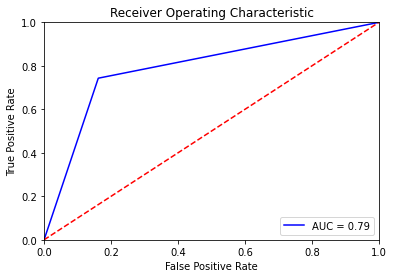

In [265]:
lor=LogisticRegression()
lor.fit(X_train,y_train)
y_pred_lor=lor.predict(X_test)
score_lor=lor.score(X_test,y_test)
report_lor=classification_report(y_test,y_pred_lor)
print(score_lor)
print('*'*50)
print(report_lor)

fpr, tpr, threshold = roc_curve(y_test, y_pred_lor)
roc_auc = auc(fpr, tpr)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

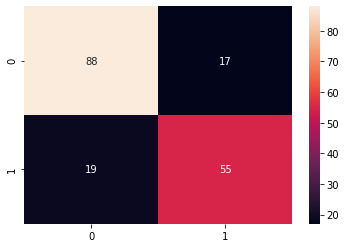

In [266]:
cm=confusion_matrix(y_test,y_pred_lor)
sns.heatmap(cm ,annot=True)

In [267]:
# decision tree

0.7821229050279329
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



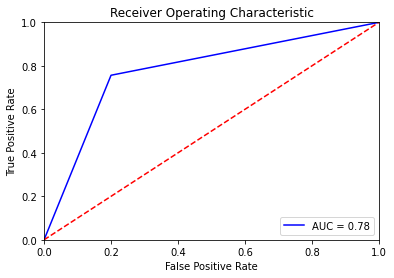

In [268]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
score_dtc=dtc.score(X_test,y_test)
report_dtc=classification_report(y_test,y_pred_dtc)
print(score_dtc)
print('*'*50)
print(report_dtc)

fpr, tpr, threshold = roc_curve(y_test, y_pred_dtc)
roc_auc = auc(fpr, tpr)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [269]:
# random forest

0.8156424581005587
**************************************************
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



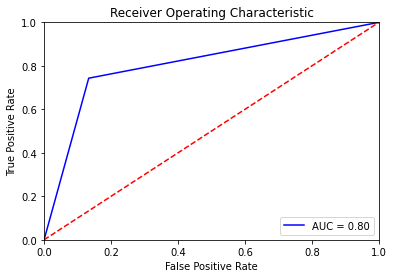

In [295]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
score_rfc=rfc.score(X_test,y_test)
report_rfc=classification_report(y_test,y_pred_rfc)
print(score_rfc)
print('*'*50)
print(report_rfc)

fpr, tpr, threshold = roc_curve(y_test, y_pred_rfc)
roc_auc = auc(fpr, tpr)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [271]:
# gaussian NB

0.770949720670391
**************************************************
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



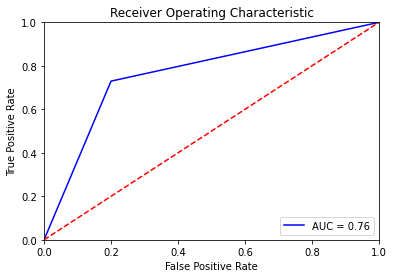

In [272]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
score_gnb=gnb.score(X_test,y_test)
report_gnb=classification_report(y_test,y_pred_gnb)
print(score_gnb)
print('*'*50)
print(report_gnb)

fpr, tpr, threshold = roc_curve(y_test, y_pred_gnb)
roc_auc = auc(fpr, tpr)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [273]:
# multinomial nb

0.7262569832402235
**************************************************
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.51      0.61        74

    accuracy                           0.73       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179



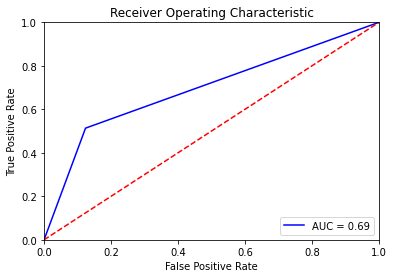

In [274]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
score_mnb=mnb.score(X_test,y_test)
report_mnb=classification_report(y_test,y_pred_mnb)
print(score_mnb)
print('*'*50)
print(report_mnb)

fpr, tpr, threshold = roc_curve(y_test, y_pred_mnb)
roc_auc = auc(fpr, tpr)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [275]:
# svc

0.6536312849162011
**************************************************
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



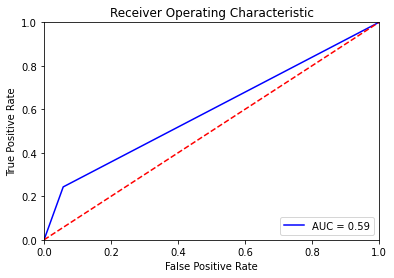

In [276]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
score_svm=svm.score(X_test,y_test)
report_svm=classification_report(y_test,y_pred_svm)
print(score_svm)
print('*'*50)
print(report_svm)

fpr, tpr, threshold = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [277]:
# hyperparameter tuning


In [279]:
# HPT rfc
params={'n_estimators':[x for x in range(100,1200,100)],
        'max_depth':[x for x in np.linspace(1,32,32)],
        'min_samples_split':[2,4,6,8,10],
        'min_samples_leaf':[1,2,3,4,5],
        'ccp_alpha':[0,0.001,0.01,0.1,1,10]}
random_rfc=RandomizedSearchCV(rfc, param_distributions=params, cv=3)
random_rfc.fit(X_train,y_train)
random_rfc_pred=random_rfc.predict(X_test)
random_rfc_score=random_rfc.score(X_test,y_test)
print(random_rfc_score)

0.8156424581005587


In [280]:

# HPT dtc

params={
        'max_depth':[x for x in np.linspace(1,32,32)],
        'min_samples_split':[2,4,6,8,10],
        'min_samples_leaf':[1,2,3,4,5],
        'ccp_alpha':[0,0.001,0.01,0.1,1,10]}
random_dtc=RandomizedSearchCV(dtc, param_distributions=params, cv=3)
random_dtc.fit(X_train,y_train)
random_dtc_pred=random_dtc.predict(X_test)
random_dtc_score=random_dtc.score(X_test,y_test)
print(random_dtc_score)

0.7932960893854749


In [281]:
## testing data

In [282]:
df_test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic Kaggle competition/test.csv')

In [283]:
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [284]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [287]:
df_new=df_test['PassengerId']

In [288]:
df_new.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [289]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].median())

In [290]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [291]:
# age = mean values

df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())
df_test['Embarked']=df_test['Embarked'].fillna('S')
df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

# feature addition 

def age_range(x):
  if x<=16:
    return 0
  elif (x>16)&(x<=30):
    return 1
  elif (x>30)&(x<=45):
    return 2
  elif (x>45)&(x<=60):
    return 3
  else:
    return 4
df_test['Age_range']=df_test['Age'].apply(age_range)
df_test[(df_test['SibSp']==0)&(df_test['Parch']==0)]
df_test['ADD_col']=df_test['Parch']+df_test['SibSp']
def alone(x):
  if x==0:
    return 0
  else:
    return 1
df_test['Alone']=df_test['ADD_col'].apply(alone)
df_test.drop(['SibSp','Parch','ADD_col'], axis=1, inplace=True)
df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test['Embarked']=le.fit_transform(df_test['Embarked'])

In [292]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Age_range,Alone
0,3,1,34.5,7.8292,1,2,0
1,3,0,47.0,7.0000,2,3,1
2,2,1,62.0,9.6875,1,4,0
3,3,1,27.0,8.6625,2,1,0
4,3,0,22.0,12.2875,2,1,1


In [293]:
df_new.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [297]:
y_pred_test=random_rfc.predict(df_test)

In [298]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [299]:
submission_1 = pd.DataFrame({
        "PassengerId": df_new,
        "Survived": y_pred_test
    })

In [302]:
submission_1.to_csv('submit.csv',index=False)